**IMPORT**

In [1]:
# Get necessary imports
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import lines
%matplotlib inline

**CREATE DATAFRAME, STARTING AUG 03**

In [2]:
# Create the dataframe of cases and dates
todaysDate = datetime.date.today()
date_list = [todaysDate - datetime.timedelta(days=x+1) for x in range(28)]
daily_total_tests = [3,10,7,6,3,10,7,200,18,41,42,119,11,29,416,357,606,265,429,298,359,666,414,410,632,517,380,369][::-1]
positive_cases_count = [0,0,0,0,0,1,2,6,6,9,13,15,4,16,102,89,82,26,28,19,31,39,20,18,21,17,10,3][::-1]
total_confirmed_cases = [0,0,0,0,0,1,3,9,15,24,37,52,56,72,174,263,345,371,399,418,449,488,508,526,547,564,574,577][::-1]
d = {'Date': date_list, 
     'Positive Cases Per Day': positive_cases_count, 
     'Daily Total Tests': daily_total_tests,
     'Total Confirmed Cases': total_confirmed_cases}
df = pd.DataFrame(d)
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df['Positive Rate of Cases'] = 100 * df['Positive Cases Per Day'] / df['Daily Total Tests']
df.head()

,Positive Cases Per Day,Daily Total Tests,Total Confirmed Cases,Positive Rate of Cases
Date,,,,
2020-08-30,3,369,577,0.813008
2020-08-29,10,380,574,2.631579
2020-08-28,17,517,564,3.288201
2020-08-27,21,632,547,3.322785
2020-08-26,18,410,526,4.390244


**SET THE ROLLING AVERAGE VALUE**

In [3]:
rollingAverageValue = 7

### **BELOW PLOTS INCLUDE ROLLING AVERAGES ADJUSTED FOR SHIFT**

**POSITIVE CASES PER DAY**

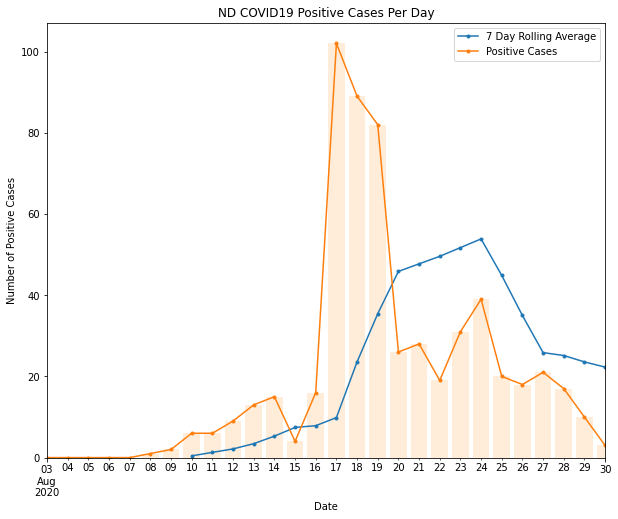

In [4]:
_, ax = plt.subplots()
(df.rolling(window = rollingAverageValue).
 agg({'Positive Cases Per Day':'mean'}).shift(periods=-rollingAverageValue).
 plot(figsize = (10, 8),
      title = 'ND COVID19 Positive Cases Per Day',
      marker = '.', ax=ax))
df['Positive Cases Per Day'].plot(ax=ax, marker = '.')
plt.bar(df.index, df['Positive Cases Per Day'], alpha = 0.15,  color='darkorange')
ax.legend(['%d Day Rolling Average' % rollingAverageValue, 'Positive Cases'])
plt.xlabel('Date')
plt.ylabel('Number of Positive Cases')
plt.show()

**TOTAL TESTS COMPLETED DAILY**

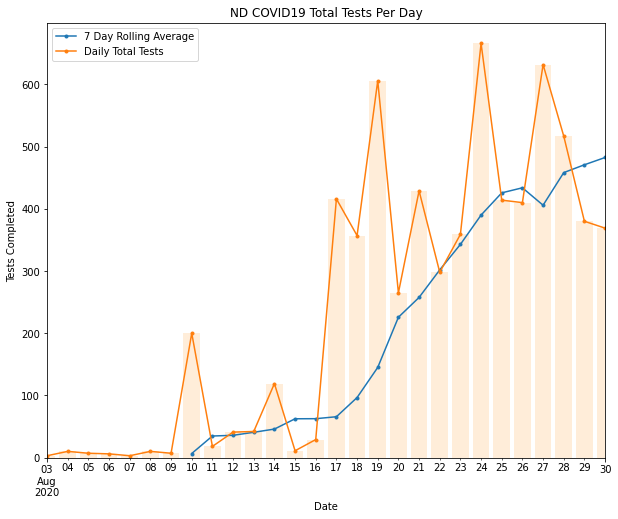

In [5]:
ax=(df.rolling(window = rollingAverageValue).
 agg({'Daily Total Tests':'mean'}).shift(periods=-rollingAverageValue).
 plot(figsize = (10, 8),
      title = 'ND COVID19 Total Tests Per Day',
      marker = '.'))
df['Daily Total Tests'].plot(ax=ax, marker = '.')
plt.bar(df.index, df['Daily Total Tests'], alpha = 0.15,  color='darkorange')
ax.legend(['%d Day Rolling Average' % rollingAverageValue, 'Daily Total Tests'])
plt.xlabel('Date')
plt.ylabel('Tests Completed')
plt.show()

**TOTAL CONFIRMED CASES**

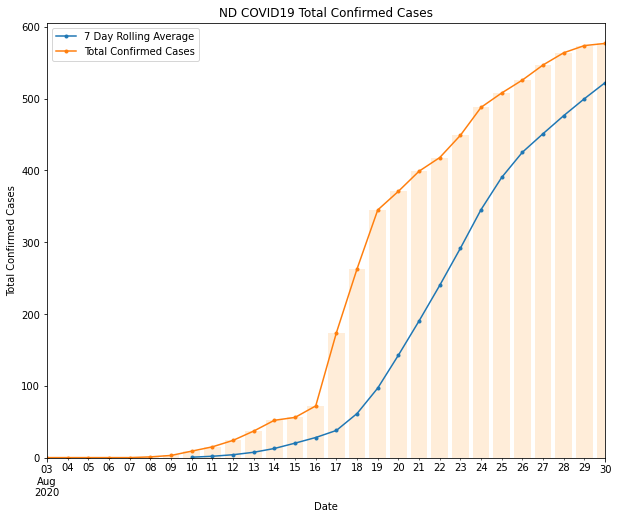

In [6]:
ax=(df.rolling(window = rollingAverageValue).
 agg({'Total Confirmed Cases':'mean'}).shift(periods=-rollingAverageValue).
 plot(figsize = (10, 8),
      title = 'ND COVID19 Total Confirmed Cases',
      marker = '.'))
df['Total Confirmed Cases'].plot(ax=ax, marker = '.')
plt.bar(df.index, df['Total Confirmed Cases'], alpha = 0.15,  color='darkorange')
ax.legend(['%d Day Rolling Average' % rollingAverageValue, 'Total Confirmed Cases'])
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.show()

**POSITIVE CASES PERCENTAGE**

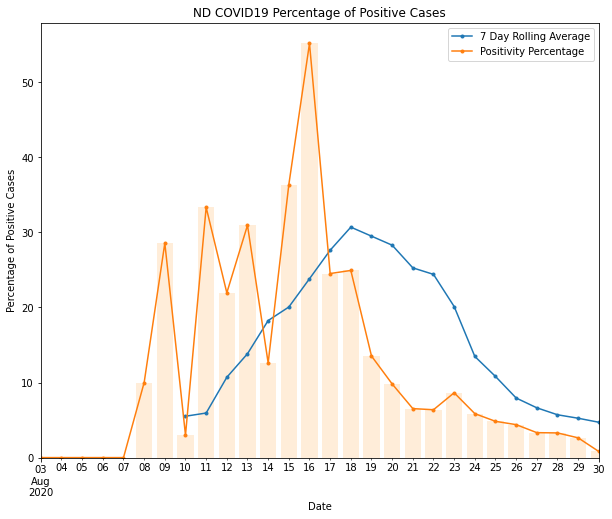

In [7]:
ax=(df.rolling(window = rollingAverageValue).
 agg({'Positive Rate of Cases':'mean'}).shift(periods=-rollingAverageValue).
 plot(figsize = (10, 8),
      title = 'ND COVID19 Percentage of Positive Cases',
      marker = '.'))
df['Positive Rate of Cases'].plot(ax=ax, marker = '.')
plt.bar(df.index, df['Positive Rate of Cases'], alpha = 0.15,  color='darkorange')
ax.legend(['%d Day Rolling Average' % rollingAverageValue, 'Positivity Percentage'])
plt.xlabel('Date')
plt.ylabel('Percentage of Positive Cases')
plt.show()

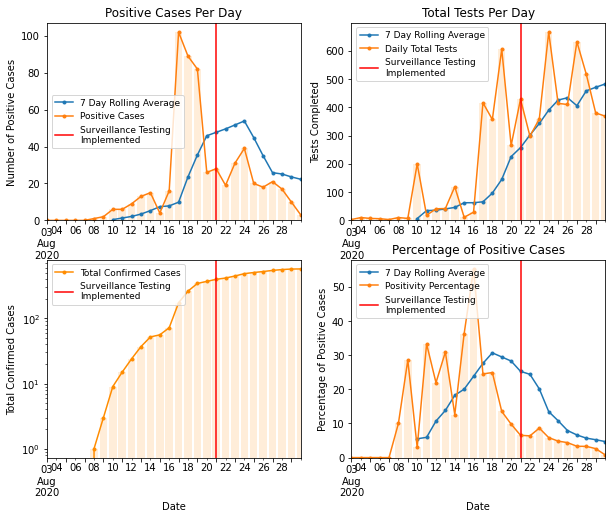

In [8]:
plt.rcParams.update({
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white"})

f = plt.figure(figsize=(20,20))

ax = f.add_subplot(221)
(df.rolling(window = rollingAverageValue).
 agg({'Positive Cases Per Day':'mean'}).shift(periods=-rollingAverageValue).
 plot(figsize = (10, 8),
      title = 'Positive Cases Per Day',
      marker = '.', ax=ax))
df['Positive Cases Per Day'].plot(ax=ax, marker = '.')
ax.axvline(x=pd.Timestamp('2020-08-21'),color='r')
plt.bar(df.index, df['Positive Cases Per Day'], alpha = 0.15,  color='darkorange')
ax.legend(['%d Day Rolling Average' % rollingAverageValue, 'Positive Cases', 'Surveillance Testing\nImplemented'], prop={'size': 9})
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 2))
plt.xlabel('Date')
plt.ylabel('Number of Positive Cases')

ax2 = f.add_subplot(222)
(df.rolling(window = rollingAverageValue).
 agg({'Daily Total Tests':'mean'}).shift(periods=-rollingAverageValue).
 plot(figsize = (10, 8),
      title = 'Total Tests Per Day',
      marker = '.', ax=ax2))
df['Daily Total Tests'].plot(ax=ax2, marker = '.')
ax2.axvline(x=pd.Timestamp('2020-08-21'),color='r')
plt.bar(df.index, df['Daily Total Tests'], alpha = 0.15,  color='darkorange')
ax2.legend(['%d Day Rolling Average' % rollingAverageValue, 'Daily Total Tests', 'Surveillance Testing\nImplemented'], prop={'size': 9})
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(start, end, 2))
plt.xlabel('Date')
plt.ylabel('Tests Completed')

ax3 = f.add_subplot(223)
#(df.rolling(window = rollingAverageValue).
# agg({'Total Confirmed Cases':'mean'}).shift(periods=-rollingAverageValue).
# plot(figsize = (10, 8),
#      title = 'Total Confirmed Cases',
#      marker = '.', ax=ax3))
df['Total Confirmed Cases'].plot(ax=ax3, marker = '.', color='darkorange')
ax3.axvline(x=pd.Timestamp('2020-08-21'),color='r')
plt.bar(df.index, df['Total Confirmed Cases'], alpha = 0.15,  color='darkorange')
ax3.legend(['Total Confirmed Cases', 'Surveillance Testing\nImplemented'], prop={'size': 9})
ax3.set_yscale('log')
start, end = ax3.get_xlim()
ax3.xaxis.set_ticks(np.arange(start, end, 2))
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')

ax4 = f.add_subplot(224)
(df.rolling(window = rollingAverageValue).
 agg({'Positive Rate of Cases':'mean'}).shift(periods=-rollingAverageValue).
 plot(figsize = (10, 8),
      title = 'Percentage of Positive Cases',
      marker = '.', ax=ax4))
df['Positive Rate of Cases'].plot(ax=ax4, marker = '.')
ax4.axvline(x=pd.Timestamp('2020-08-21'),color='r')
plt.bar(df.index, df['Positive Rate of Cases'], alpha = 0.15,  color='darkorange')
ax4.legend(['%d Day Rolling Average' % rollingAverageValue, 'Positivity Percentage', 'Surveillance Testing\nImplemented'], prop={'size': 9})
start, end = ax4.get_xlim()
ax4.xaxis.set_ticks(np.arange(start, end, 2))
plt.xlabel('Date')
plt.ylabel('Percentage of Positive Cases')


plt.show()